In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('SAMSUNG.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# In ra 5 dòng đầu tiên của DataFrame
df


,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,51.02,51.38,51.40,50.78,8.46M,0.12%
1,1/3/2018,51.62,52.54,52.56,51.42,9.92M,1.18%
2,1/4/2018,51.08,52.12,52.18,50.64,11.64M,-1.05%
3,1/5/2018,52.12,51.30,52.12,51.20,9.33M,2.04%
4,1/8/2018,52.02,52.40,52.52,51.50,8.36M,-0.19%
...,...,...,...,...,...,...,...
1456,12/4/2023,72.60,72.70,72.90,72.50,0.55K,0.83%
1457,12/5/2023,71.20,72.30,72.40,71.20,0.45K,-1.93%
1458,12/6/2023,71.70,71.90,72.10,71.60,0.25K,0.70%
1459,12/7/2023,71.50,71.80,71.90,71.10,0.06K,-0.28%


In [3]:
# 2.  chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 0.1, 'gamma': 0.001}
Best score: 0.2827621550039331


In [5]:


y_pred = svr_rbf.predict(x_test)
y_pred


array([56.68939358, 56.78924214, 56.38995736, 55.09449902, 56.48975081,
       55.59232567, 55.990978  , 56.38995736, 56.58956301, 56.38995736,
       55.49271598, 55.7916097 , 56.98899173, 58.08872889, 59.08977782,
       59.59061631, 58.68924146, 59.39026166, 59.79099249, 59.49043608,
       59.29009352, 58.98963117, 59.79099249, 61.39437078, 61.69499909,
       60.99350984, 62.69687116, 62.39635521, 61.89540474, 62.19598733,
       61.49458244, 61.89540474, 61.29415735, 60.69285911, 60.79307576,
       61.19394248, 61.19394248, 59.99138668, 60.09158945, 61.69499909,
       62.69687116, 61.99560268, 60.59264324, 59.59061631, 59.08977782,
       58.68924146, 60.09158945, 59.49043608, 59.79099249, 60.09158945,
       59.69080193, 58.98963117, 59.39026166, 58.58912981, 58.58912981,
       58.58912981, 57.88865035, 57.58863134, 57.88865035, 57.08889197,
       55.691957  , 55.59232567, 55.49271598, 57.4886531 , 58.18878659,
       58.88949259, 60.19179544, 60.59264324, 60.69285911, 60.69

In [6]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[72.6]])

In [7]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([72.0933787]),
 array([71.58654936]),
 array([71.07973987]),
 array([70.57315633]),
 array([70.06697462]),
 array([69.5613342]),
 array([69.05633415]),
 array([68.55203109]),
 array([68.04843911]),
 array([67.54553117]),
 array([67.04324195]),
 array([66.54147187]),
 array([66.04009202]),
 array([65.53894984]),
 array([65.03787535]),
 array([64.53668785]),
 array([64.03520284]),
 array([63.53323922]),
 array([63.03062647]),
 array([62.52721191]),
 array([62.02286783]),
 array([61.51749839]),
 array([61.01104618]),
 array([60.50349836]),
 array([59.99489208]),
 array([59.4853191]),
 array([58.97492941]),
 array([58.46393354]),
 array([57.9526035]),
 array([57.44127204])]

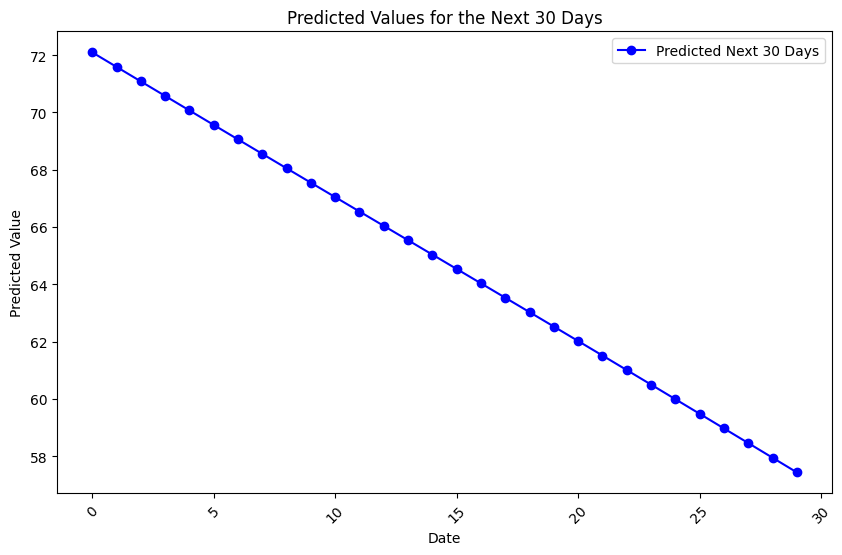

In [8]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [9]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [10]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 0.4536137072128478
Testing MAPE: 0.00533460039277189
Testing MAE: 0.3480103634510513


In [11]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 0.4536137072128478
Testing MAPE: 0.00533460039277189
Testing MAE: 0.3480103634510513


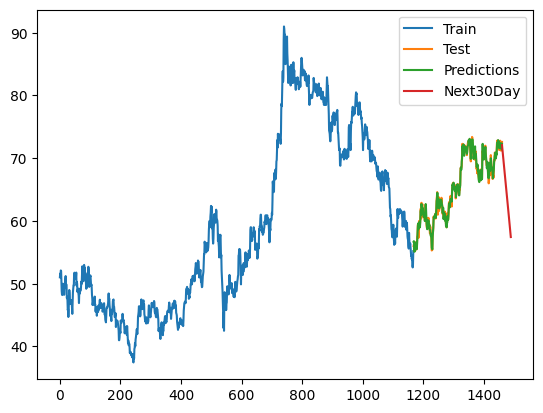

In [12]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()